In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

file_dir = '/Users/yuxia/sparsity2/'

In [41]:
def sparsity_plot_contrib(filename):
    list = filename.split('_')
    model = list[1]
    attr = "_".join(list[2:]).split(".")[0]

    df = pd.read_pickle(file_dir + filename)
    df = pd.DataFrame(df)
    df['sum'] = df['val'].cumsum()
    plt.plot([math.log(i+1) for i in range(len(df))], df['sum'], marker='o',markersize = 3,linestyle='-',label='All layers')

    plt.xlabel('log(neuron)')
    plt.ylabel('sparsity')
    plt.legend()
    plt.title(f'Sparsity of {model} on {attr}')
    plt.show()
    plt.show()

In [66]:
def sparsity_plot(filename):
    list = filename.split('_')
    model = list[1]
    attr = "_".join(list[2:]).split(".")[0]

    df = pd.read_pickle(file_dir + filename)
    df = pd.DataFrame(df,columns = ['neuron'])
    #df['sum'] = df['neuron'].cumsum()
    plt.plot([i+1 for i in range(len(df))], df['neuron'], marker='o',markersize = 3,linestyle='-',label='All layers')
    plt.xlabel('num of neurons')
    #plt.plot([math.log(i+1) for i in range(len(df))], df['sum'], marker='o',markersize = 3,linestyle='-',label='All layers')
    #plt.xlabel('log(neuron)')

    df2 = pd.read_pickle(file_dir + filename.replace('.pickle', '_all.pickle'))
    plt.axhline(y=df2[-1], color='r', linestyle='--', label = 'Model')
    
    plt.ylabel('sparsity')
    plt.legend()
    plt.title(f'Sparsity of {model} on {attr}')
    plt.show()

In [67]:
files = list(filter(
    lambda x: 'topk' in x and '_all.pickle' not in x,
    os.listdir(file_dir)))

In [68]:
files

['topk_bert-base-cased_rc_plural.pickle',
 'topk_bert-base-cased_prep_plural.pickle',
 'topk_bert-base-multilingual-cased_prep_plural.pickle',
 'topk_bert-base-multilingual-cased_rc_plural.pickle',
 'topk_bert-base-multilingual-cased_prep_singular.pickle',
 'topk_bert-base-cased_none.pickle',
 'topk_bert-base-multilingual-cased_none.pickle',
 'topk_bert-base-multilingual-cased_rc_singular.pickle',
 'topk_bert-base-cased_rc_singular.pickle',
 'topk_bert-base-cased_prep_singular.pickle']

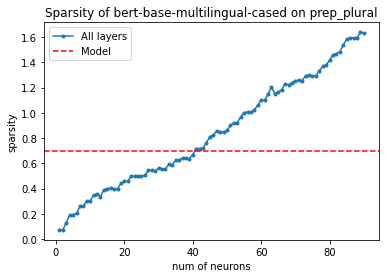

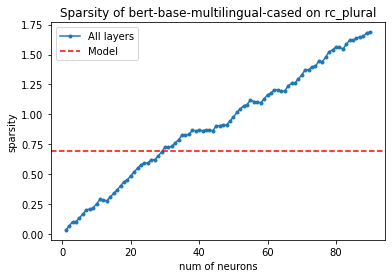

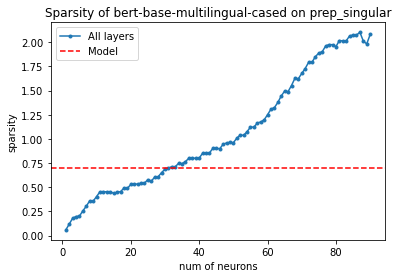

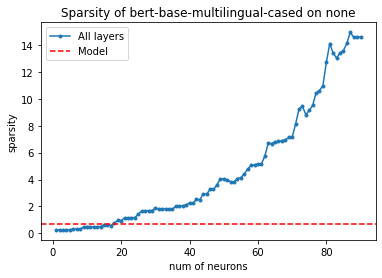

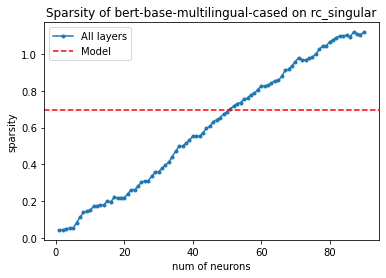

In [70]:
for file in files:
    if 'multi' in file:
        sparsity_plot(file)

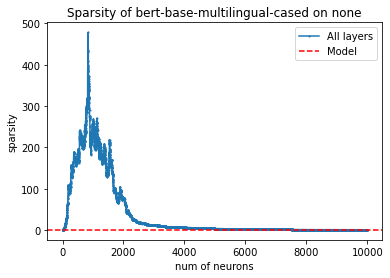

In [64]:
file_dir = '/Users/yuxia/sparsity/'
sparsity_plot('topk_bert-base-multilingual-cased_none.pickle')